In [221]:
import pandas as pd
from omegaconf import OmegaConf
import os
import matplotlib.pyplot as plt
import datasets

In [222]:
def draw_dist(df, field, p, b=20):
    if p == None: 
        small_df = df[field].astype('int64')
        q = 1
    else:
        q = df[field].astype('int64').quantile(p)
        small_df = df[df[field].astype('int64') <= q][field].astype('int64')
    print(f"There is {len(small_df)}/{len(df)} small repos less the {q} in {field}")
    plt.hist(small_df, bins=b, edgecolor='black')
    
    plt.title(f'{field} distribution')
    plt.xlabel(field)
    plt.ylabel('frequency')
    plt.show()

In [223]:
metrics = [
    'repo_symbols_count',
    'repo_tokens_count',
    'repo_words_count',
    'repo_lines_count',
    'repo_files_count',
    'repo_code_symbols_count',
    'repo_code_tokens_count',
    'repo_code_words_count',
    'repo_code_lines_count',
    'repo_code_files_count',
    'description_symbols_count',
    'description_tokens_count',
    'description_words_count',
    'description_lines_count',
    'readme_header',
    'readme_header_symbols_count',
    'readme_header_tokens_count',
    'readme_header_words_count',
    'readme_header_lines_count'
]

# Java

In [224]:
df = datasets.load_dataset('JetBrains-Research/template-generation', 'java', split='dev', cache_dir=None).to_pandas()

Generating dev split:   0%|          | 0/85 [00:00<?, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating train split:   0%|          | 0/85 [00:00<?, ? examples/s]

There is 76/85 small repos less the 655.0000000000005 in size


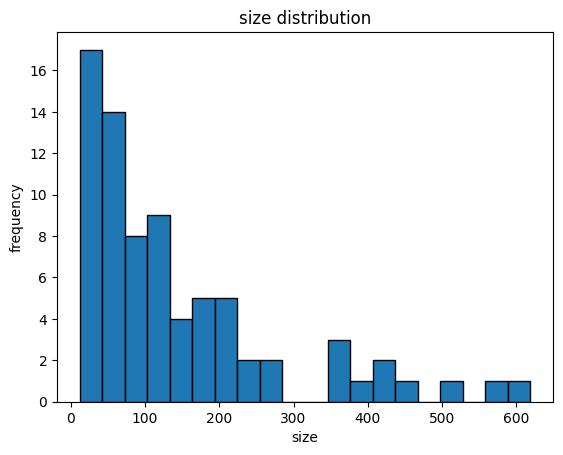

In [225]:
draw_dist(df, 'size', 0.9)

There is 85/85 small repos less the 1 in code_lines


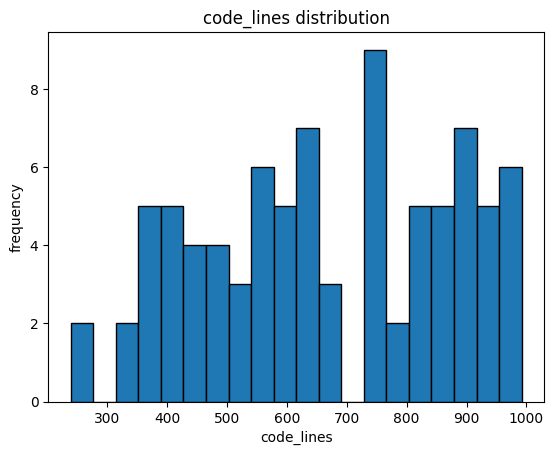

In [226]:
draw_dist(df, 'code_lines', None)

In [227]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [228]:
df[metrics].describe()

,repo_symbols_count,repo_tokens_count,repo_words_count,repo_lines_count,repo_files_count,repo_code_symbols_count,repo_code_tokens_count,repo_code_words_count,repo_code_lines_count,repo_code_files_count,description_symbols_count,description_tokens_count,description_words_count,description_lines_count,readme_header_symbols_count,readme_header_tokens_count,readme_header_words_count,readme_header_lines_count
count,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
mean,68370,17373,8008,2020,44,17563,3676,1460,499,9,76,17,11,1,630,169,68,15
std,20521,5222,2489,451,9,16429,3742,1858,370,6,33,9,6,0,1174,349,136,21
min,38973,10866,4860,1216,33,3593,700,235,135,1,24,4,1,1,0,0,0,1
25%,56902,14762,6756,1760,38,8761,1740,709,269,5,49,10,8,1,149,42,14,6
50%,63956,16493,7559,1988,43,14592,3107,1103,422,7,72,14,10,1,341,85,36,10
75%,74961,18647,8996,2220,49,20975,4270,1691,630,12,96,21,14,1,685,173,75,16
max,191090,45546,24400,4388,71,138989,32215,16745,2891,24,170,45,30,1,9710,2942,1180,187


# Python

In [229]:
df = datasets.load_dataset('JetBrains-Research/template-generation', 'py', split='dev', cache_dir=None).to_pandas()

Generating dev split:   0%|          | 0/593 [00:00<?, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating train split:   0%|          | 0/593 [00:00<?, ? examples/s]

In [230]:
df['description_words_count'] = df.apply(lambda dp: len(dp['description'].split()), axis=1)

There is 587/593 small repos less the 43.16000000000008 in description_words_count


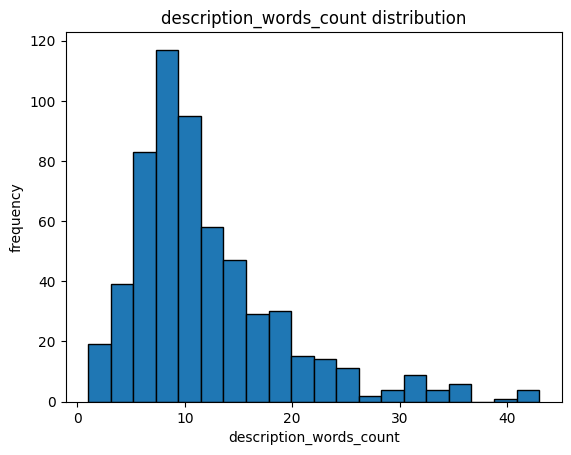

In [231]:
draw_dist(df, 'description_words_count', 0.99)

There is 533/593 small repos less the 6297.0000000000055 in size


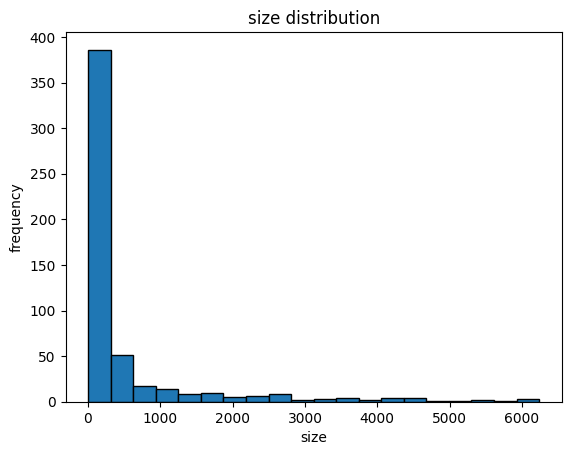

In [232]:
draw_dist(df, 'size', 0.9)

There is 593/593 small repos less the 1 in code_lines


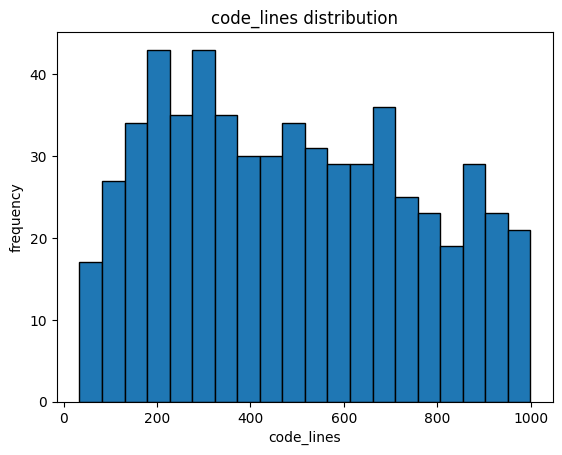

In [233]:
draw_dist(df, 'code_lines', None)

In [234]:
df[metrics].describe()

,repo_symbols_count,repo_tokens_count,repo_words_count,repo_lines_count,repo_files_count,repo_code_symbols_count,repo_code_tokens_count,repo_code_words_count,repo_code_lines_count,repo_code_files_count,description_symbols_count,description_tokens_count,description_words_count,description_lines_count,readme_header_symbols_count,readme_header_tokens_count,readme_header_words_count,readme_header_lines_count
count,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593
mean,170598,60402,17110,3721,43,14107,3475,1256,414,8,88,19,13,1,616,165,66,14
std,1089558,422490,112436,29090,14,17037,5453,1415,358,9,106,23,17,0,1457,467,137,23
min,28246,7823,4231,918,26,0,0,0,0,0,4,2,1,1,0,0,0,1
25%,43490,11825,5832,1415,32,4838,1225,446,160,2,52,10,8,1,127,30,13,6
50%,56938,15061,7101,1791,40,10553,2437,889,329,5,69,14,10,1,309,77,34,9
75%,75999,20077,8832,2183,51,18722,4547,1602,563,11,102,22,15,1,642,159,72,15
max,20060827,8572610,2143061,625101,120,308034,93775,22811,4532,65,2297,432,376,1,23318,7822,2193,314


# Kotlin

In [235]:
df = datasets.load_dataset('JetBrains-Research/template-generation', 'kt', split='dev', cache_dir=None).to_pandas()

Generating dev split:   0%|          | 0/21 [00:00<?, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating train split:   0%|          | 0/21 [00:00<?, ? examples/s]

In [236]:
df['description_words_count'] = df.apply(lambda dp: len(dp['description'].split()), axis=1)

There is 20/21 small repos less the 35.000000000000014 in description_words_count


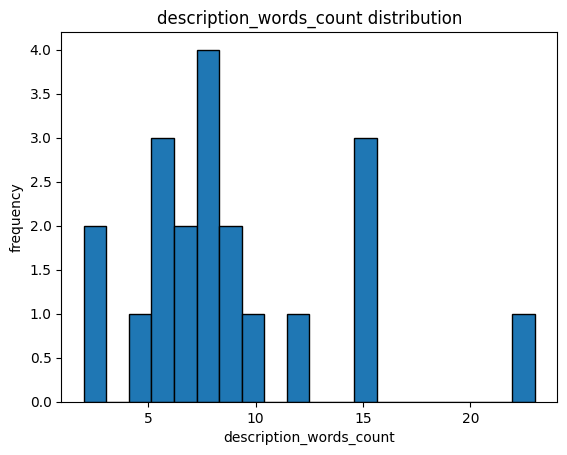

In [237]:
draw_dist(df, 'description_words_count', 0.99)

There is 16/21 small repos less the 3212.0 in size


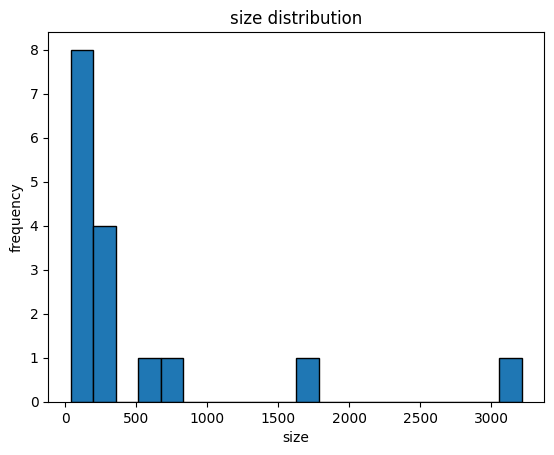

In [238]:
draw_dist(df, 'size', 0.75)

There is 21/21 small repos less the 1 in code_lines


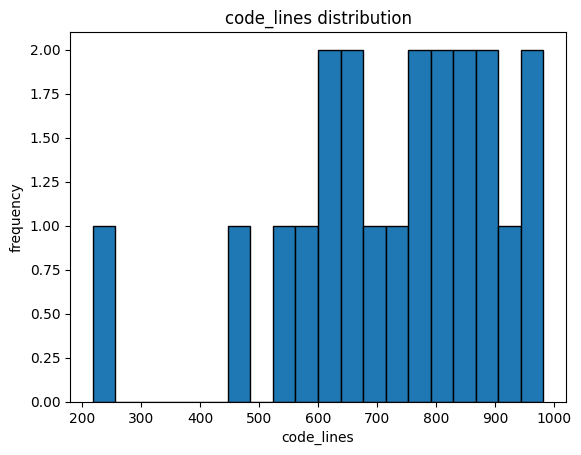

In [239]:
draw_dist(df, 'code_lines', None)

In [240]:
df[metrics].describe()

,repo_symbols_count,repo_tokens_count,repo_words_count,repo_lines_count,repo_files_count,repo_code_symbols_count,repo_code_tokens_count,repo_code_words_count,repo_code_lines_count,repo_code_files_count,description_symbols_count,description_tokens_count,description_words_count,description_lines_count,readme_header_symbols_count,readme_header_tokens_count,readme_header_words_count,readme_header_lines_count
count,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
mean,85381,24927,9139,2544,55,8975,1900,732,293,10,65,14,10,1,562,134,68,18
std,55473,22765,3078,1493,10,3810,885,368,135,6,44,9,8,0,711,174,83,25
min,36013,9851,5384,1230,39,2436,621,277,111,2,14,2,2,1,0,0,0,1
25%,59992,15519,7567,1851,48,7307,1513,486,184,6,38,8,6,1,107,26,17,6
50%,69118,17807,8166,2147,56,8535,1693,644,261,10,53,12,8,1,309,71,35,9
75%,78090,19827,9785,2362,61,10708,2151,883,363,12,84,17,12,1,668,151,92,13
max,293783,108530,19799,8281,77,18693,4324,1634,573,29,204,43,38,1,2910,706,326,106
